In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import random
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')


In [2]:
snn_df=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\projects\final year projects\dataset\stratified_sample_for_modeling.csv")

In [3]:
snn_df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,device,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000002,1.766602,...,0.000000e+00,5.306770,98.0,0.000002,138.592929,4.070000e-12,-8.750000e-29,-3.400000e-17,Danmini_Doorbell,benign
1,3.959443,101.999972,1.125510e-04,3.977416,101.998141,0.007434,4.114565,101.880681,0.463040,5.541431,...,-1.320000e-17,4.219563,102.0,0.000018,144.249783,3.950000e-10,5.160000e-22,1.950000e-12,Danmini_Doorbell,benign
2,4.969537,102.000000,0.000000e+00,4.981694,102.000000,0.000000,4.993892,101.999976,0.001027,5.996361,...,0.000000e+00,4.216806,102.0,0.000001,144.249783,4.070000e-12,1.310000e-28,5.100000e-17,Danmini_Doorbell,benign
3,2.991987,102.000000,0.000000e+00,2.995188,102.000000,0.000000,2.998398,101.999958,0.001758,3.843674,...,-5.540000e-29,3.405410,102.0,0.000001,144.249783,4.070000e-12,-3.030000e-28,-1.180000e-16,Danmini_Doorbell,benign
4,4.909553,102.000000,3.640000e-12,4.945479,102.000000,0.000000,4.981743,101.999991,0.000380,5.865181,...,0.000000e+00,4.228742,102.0,0.000000,144.249783,1.820000e-12,1.460000e-29,0.000000e+00,Danmini_Doorbell,benign


In [4]:
print("\nData Info:")
snn_df.info(memory_usage='deep')


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 50.1 MB


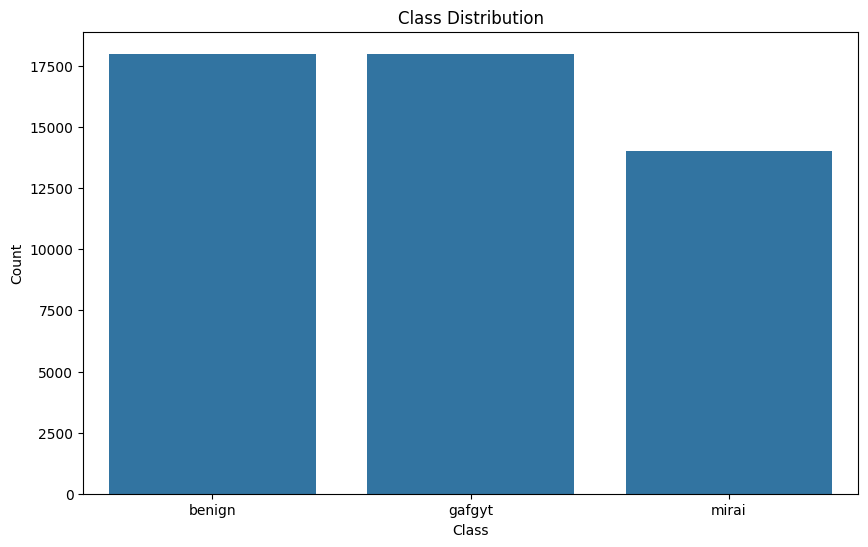

In [5]:
#Check class Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=snn_df, x='label')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


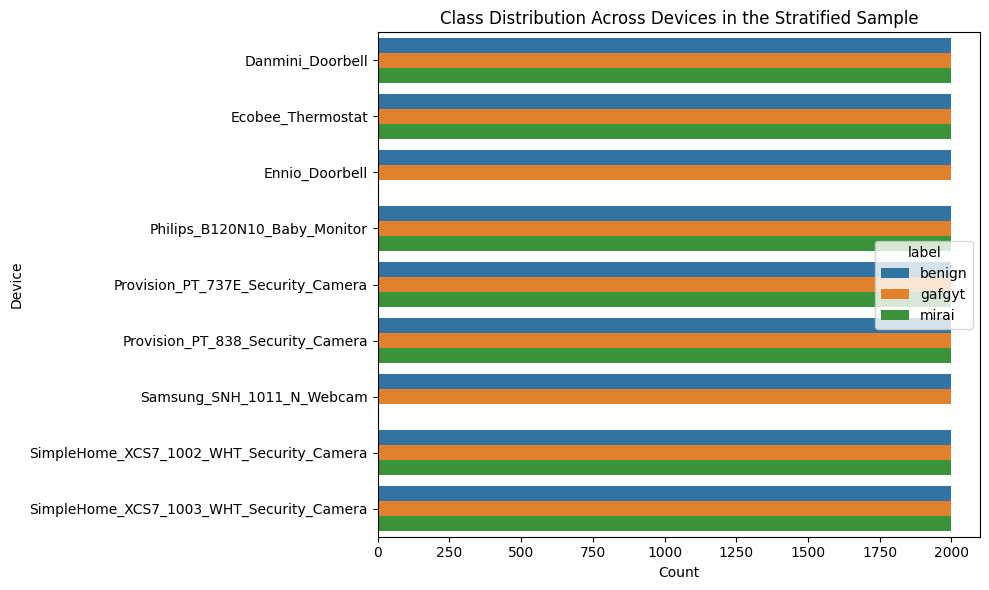

In [7]:
# a) Check Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='device', hue='label', data=snn_df)
plt.title('Class Distribution Across Devices in the Stratified Sample')
plt.xlabel('Count')
plt.ylabel('Device')
plt.tight_layout()
plt.show()

In [ ]:
# b) Correlation Matrix Heatmap
# This helps visualize multicollinearity in the feature set.
print("\nGenerating Correlation Matrix Heatmap...")
plt.figure(figsize=(12, 10))
# Drop non-numeric columns for correlation calculation
numeric_df = snn_df.drop(columns=['label', 'device'])
corr = numeric_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix of the Sampled Data')
plt.show()


Generating Correlation Matrix Heatmap...


In [14]:
# --- 3. Feature Scaling ---
# Scaling is essential before applying PCA.

print("\n--- Preprocessing: Scaling and PCA ---")
# Separate features (X) from the labels (y)
X = snn_df.drop(columns=['label', 'device'])
y = snn_df['label']
# Initialize the scaler and fit_transform the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features have been successfully scaled.")
print("Shape of scaled features:", X_scaled.shape)


--- Preprocessing: Scaling and PCA ---
Features have been successfully scaled.
Shape of scaled features: (50000, 115)


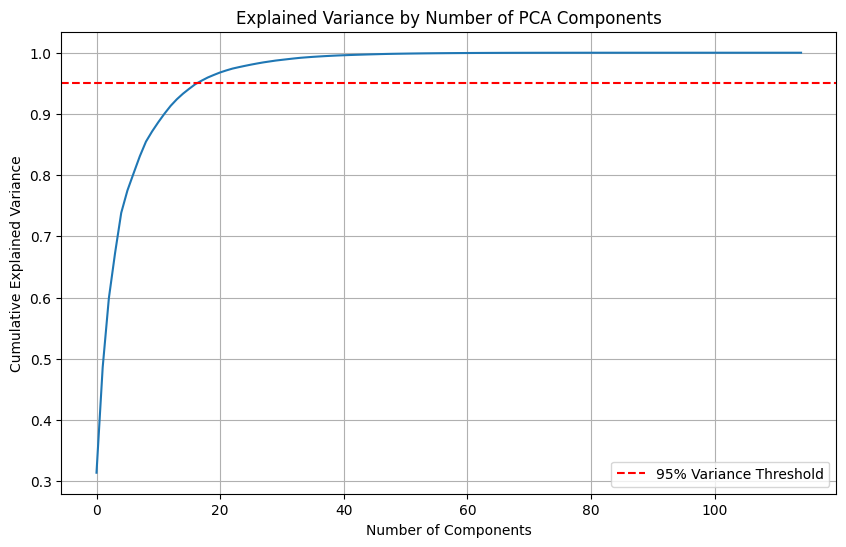

In [16]:
# --- 4. Principal Component Analysis (PCA) ---

# a) Determine the Optimal Number of Components
# We'll create a scree plot to see the cumulative explained variance.
pca_explorer = PCA().fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_explorer.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.grid(True)
# Add a line for 95% variance threshold
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend(loc='best')
plt.show()

Instead of using all 115 features to train the  model, this chart shows that we can use just 30 principal components and still retain 95% of the original data's information.

In [17]:
# b) Apply PCA for Visualization
# Let's reduce the data to 2 components to create a scatter plot.
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
print("\nData transformed into 2 principal components for visualization.")

# Create a new DataFrame for plotting
df_pca_plot = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
df_pca_plot['label'] = y.values


Data transformed into 2 principal components for visualization.


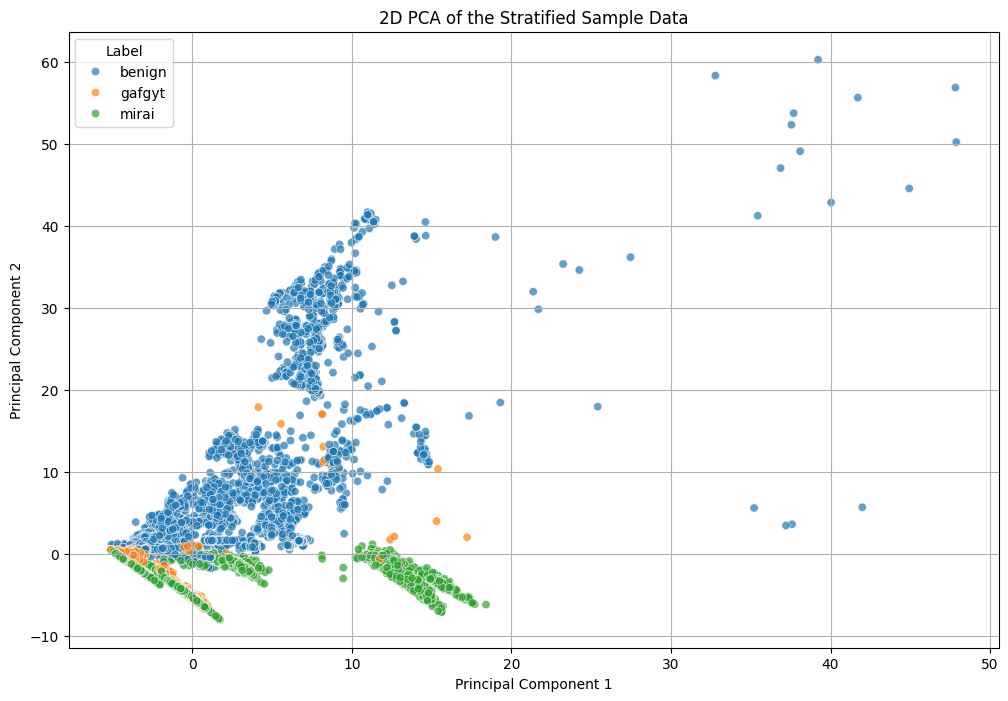

In [18]:
# c) Visualize the PCA Results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=df_pca_plot, alpha=0.7)
plt.title('2D PCA of the Stratified Sample Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label')
plt.grid(True)
plt.show()

Here we can see that after two principal components still the network traffic is Highly seperable and have distinct patterns 


Here i am going with Siamese Neural network as my base model and to set a benchmzrk 

In [19]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model


In [20]:
# Separate benign data for training, and attack data for testing
benign_df = snn_df[snn_df['label'] == 'benign']
attack_df = snn_df[snn_df['label'] != 'benign']

In [21]:
# Isolate the numerical features for processing
X_benign_raw = benign_df.drop(columns=['label', 'device']).values
X_attack_raw = attack_df.drop(columns=['label', 'device']).values

In [22]:
# Scale the data: Fit the scaler ONLY on benign data, then transform all
scaler = StandardScaler()
X_benign_scaled = scaler.fit_transform(X_benign_raw)
X_attack_scaled = scaler.transform(X_attack_raw)

input_shape = (X_benign_scaled.shape[1],)

In [23]:
# --- Step 2: Create Training Pairs ---
def create_siamese_pairs(X, num_pairs):
    pairs = []
    labels = [] # 1 for positive pair, 0 for negative pair
    for _ in range(num_pairs):
        # Create a positive pair (similar)
        idx1 = np.random.randint(0, len(X))
        anchor = X[idx1]
        positive = anchor + np.random.normal(loc=0.0, scale=0.05, size=anchor.shape)
        pairs.append([anchor, positive])
        labels.append(1)
        
        # Create a negative pair (dissimilar)
        idx2 = np.random.randint(0, len(X))
        negative = X[idx2]
        pairs.append([anchor, negative])
        labels.append(0)
        
    return np.array(pairs), np.array(labels)

pairs_train, labels_train = create_siamese_pairs(X_benign_scaled, num_pairs=20000)

In [39]:
# --- Step 3: Build the Model (with the fix and new metric) ---
def build_embedding_model(input_shape):
    input_layer = Input(shape=input_shape)
    x = Dense(128, activation='relu')(input_layer)
    x = Dense(64, activation='relu')(x)
    embedding = Dense(32, activation=None)(x)
    embedding = Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(embedding)
    return Model(inputs=input_layer, outputs=embedding, name="Embedding_Model")



In [40]:
def contrastive_loss_squared(y_true, y_pred_sq, margin=1.0):
    y_true = tf.cast(y_true, tf.float32)
    margin_square = tf.square(tf.maximum(margin - tf.sqrt(y_pred_sq + 1e-7), 0))
    return tf.reduce_mean(y_true * y_pred_sq + (1 - y_true) * margin_square)



In [41]:
# --- NEW: Custom Accuracy Function ---
def accuracy(y_true, y_pred_sq):
    """Calculates accuracy based on a distance threshold of 0.5"""
    y_true = tf.cast(y_true, tf.float32)
    # Correct prediction for a positive pair (y_true=1) is a small distance (<0.5)
    # Correct prediction for a negative pair (y_true=0) is a large distance (>=0.5)
    predicted_labels = tf.cast(y_pred_sq < 0.5, tf.float32)
    return tf.reduce_mean(tf.cast(tf.equal(y_true, predicted_labels), tf.float32))

embedding_model_snn = build_embedding_model(input_shape)
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)
embedding_a = embedding_model_snn(input_a)
embedding_b = embedding_model_snn(input_b)
distance_squared = Lambda(lambda x: tf.reduce_sum(tf.square(x[0] - x[1]), axis=1, keepdims=True))([embedding_a, embedding_b])
siamese_model = Model(inputs=[input_a, input_b], outputs=distance_squared)


In [42]:
# --- THE FIX IS HERE ---
# Add the custom accuracy function to the 'metrics' list
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
siamese_model.compile(optimizer=optimizer, loss=contrastive_loss_squared, metrics=[accuracy]) # <-- ADDED METRIC


In [43]:
# --- Step 4: Train the Model ---
print("--- Training Siamese Network (Stable Version with Accuracy) ---")
history = siamese_model.fit(
    [pairs_train[:, 0], pairs_train[:, 1]], labels_train,
    epochs=15,
    batch_size=64,
    verbose=1,
    validation_split=0.1 # Optional: See performance on a validation set
)

--- Training Siamese Network (Stable Version with Accuracy) ---
Epoch 1/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5069 - loss: 0.0304 - val_accuracy: 0.5000 - val_loss: 0.0193
Epoch 2/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5066 - loss: 0.0181 - val_accuracy: 0.5000 - val_loss: 0.0161
Epoch 3/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5063 - loss: 0.0146 - val_accuracy: 0.5000 - val_loss: 0.0144
Epoch 4/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5077 - loss: 0.0136 - val_accuracy: 0.5000 - val_loss: 0.0132
Epoch 5/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5069 - loss: 0.0128 - val_accuracy: 0.5000 - val_loss: 0.0125
Epoch 6/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5073 - loss: 0.0116 - val_accuracy: 0.5000 - val_loss: 0.0119
Epoch 7/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5084 - loss: 0.0115 - val_accuracy: 0.5000 - val_loss: 0.0116
Epoch 8/15
563/563 ━━━━━━━━━━━━━━━━━━━━ 

In [44]:
# --- Step 5: Evaluate for Anomaly Detection (with the fix) ---
# --- FIX 3: Use SQUARED distances for evaluation too ---
benign_embeddings = embedding_model_snn.predict(X_benign_scaled)
benign_centroid = np.mean(benign_embeddings, axis=0)
# Calculate squared distances here
distances_sq = np.sum(np.square(benign_embeddings - benign_centroid), axis=1)
# The threshold will now be a squared value
threshold_sq = np.percentile(distances_sq, 95)
print(f"\nSiamese Anomaly Threshold (Squared): {threshold_sq:.4f}")

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Siamese Anomaly Threshold (Squared): 1.0757


In [45]:
attack_embeddings = embedding_model_snn.predict(X_attack_scaled)
# Calculate squared distances for attacks
attack_distances_sq = np.sum(np.square(attack_embeddings - benign_centroid), axis=1)
# Compare squared distance with squared threshold
predictions = ["Anomaly" if d_sq > threshold_sq else "Benign" for d_sq in attack_distances_sq]
accuracy = np.mean(np.array(predictions) == 'Anomaly')
print(f"Botnet Detection Rate (Siamese): {accuracy*100:.2f}%")

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Botnet Detection Rate (Siamese): 0.00%


In [46]:
# --- Step 2: Create Training Triplets ---
# This function is specific to the Triplet Network
def create_triplets(X, num_triplets):
    """Generates anchor, positive, and negative samples for training."""
    anchors, positives, negatives = [], [], []
    for _ in range(num_triplets):
        # Pick a random anchor and a different random negative from benign data
        anchor_idx, negative_idx = np.random.choice(len(X), 2, replace=False)
        anchor, negative = X[anchor_idx], X[negative_idx]
        
        # Create a positive by adding a small amount of noise to the anchor
        positive = anchor + np.random.normal(0.0, 0.05, anchor.shape)
        
        anchors.append(anchor)
        positives.append(positive)
        negatives.append(negative)
        
    return [np.array(anchors), np.array(positives), np.array(negatives)]

triplets_train = create_triplets(X_benign_scaled, num_triplets=20000)

In [47]:
# --- Step 3: Build the Triplet Model ---
# We can reuse the same embedding model architecture from the SNN
embedding_model_triplet = build_embedding_model(input_shape)

def triplet_loss(y_true, y_pred, alpha=0.2):
    """Custom triplet loss function with a margin (alpha)."""
    total_length = y_pred.shape.as_list()[-1]
    anchor = y_pred[:, :total_length//3]
    positive = y_pred[:, total_length//3 : 2*total_length//3]
    negative = y_pred[:, 2*total_length//3:]
    
    pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=-1)
    
    basic_loss = pos_dist - neg_dist + alpha
    loss = tf.reduce_mean(tf.maximum(basic_loss, 0.0))
    return loss

anchor_input = Input(shape=input_shape)
positive_input = Input(shape=input_shape)
negative_input = Input(shape=input_shape)

anchor_embedding = embedding_model_triplet(anchor_input)
positive_embedding = embedding_model_triplet(positive_input)
negative_embedding = embedding_model_triplet(negative_input)

merged_vector = tf.keras.layers.concatenate([anchor_embedding, positive_embedding, negative_embedding], axis=-1)

triplet_model = Model(inputs=[anchor_input, positive_input, negative_input], outputs=merged_vector)
triplet_model.compile(optimizer='adam', loss=triplet_loss)

In [48]:
# --- Step 4: Train the Model ---
print("\n--- Training Triplet Network (Advanced) ---")
# We don't need a real 'y' label, so we pass a dummy array
dummy_y = np.zeros((len(triplets_train[0]), 1))
triplet_model.fit(
    triplets_train, dummy_y,
    epochs=15,
    batch_size=64,
    verbose=1
)


--- Training Triplet Network (Advanced) ---
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0042
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0014
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0013
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.2409e-04
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0011
Epoch 9/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.9317e-04
Epoch 10/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.7525e-04
Epoch 11/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0011
Epoch 12/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0010
Epoch 13/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7.7172e-04
Epoch 14/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.9

In [ ]:
# --- Step 5: Evaluate for Anomaly Detection ---
benign_embeddings = embedding_model_triplet.predict(X_benign_scaled)
benign_centroid = np.mean(benign_embeddings, axis=0)

distances = np.linalg.norm(benign_embeddings - benign_centroid, axis=1)
threshold = np.percentile(distances, 95)
print(f"\nTriplet Anomaly Threshold set to: {threshold:.4f}")

attack_embeddings = embedding_model_triplet.predict(X_attack_scaled)
attack_distances = np.linalg.norm(attack_embeddings - benign_centroid, axis=1)

predictions = ["Anomaly" if d > threshold else "Benign" for d in attack_distances]
accuracy = np.mean(np.array(predictions) == 'Anomaly')
print(f"Botnet Detection Rate (Triplet): {accuracy*100:.2f}%")

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Triplet Anomaly Threshold set to: 1.0755
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Botnet Detection Rate (Triplet): 0.00%
